In [55]:
%matplotlib inline

import os 
import time
import librosa
import IPython
import librosa.display
import importlib
import matplotlib
import numpy as np
import string as strp
import pr_util as util

import matplotlib.pyplot as plt

importlib.reload(util)


<module 'pr_util' from '/Users/felipefelix/USP/tcc/code/pr_util.py'>

In [24]:
y, sr = librosa.load('Rexp/100041.filtered1.wav')

178432


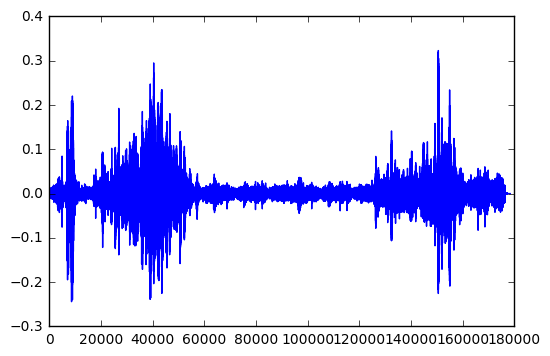

In [3]:
print(len(y))
matplotlib.pyplot.plot(y)

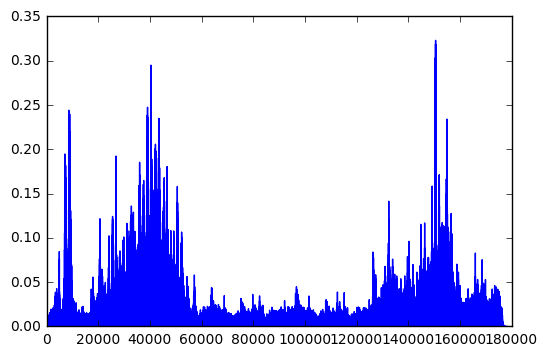

In [4]:
matplotlib.pyplot.plot(np.abs(y))

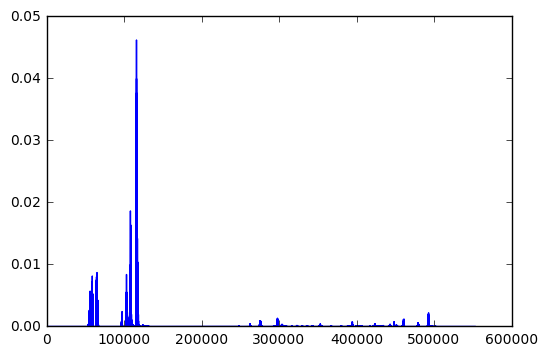

In [44]:
matplotlib.pyplot.plot(np.abs(y)**2)

In [95]:
def autodetec(y, power, thres, signal_or_change = 'signal'):
    N = len(y)
    y_env = np.abs(y) ** power
    print('máximo do envelope {}'.format(np.max(y_env)))
    print('mínimo do envelope {}'.format(np.min(y_env)))
    print('média do envelope {}'.format(np.mean(y_env)))
    thres = np.mean(y_env) * 10
    y2 = np.zeros(N)
    menor = 0
    maior = 0
    
    for y in y_env:
        if y <= thres:
            menor += 1
        else:
            maior += 1
        
    y2[y_env <= thres] = 1
    y2[y_env  > thres] = 2

    print('pct menores: {}'.format(menor/(menor+maior)))
    print('pct maiores: {}'.format(maior/(menor+maior)))

    ## y3: { 2 = silence; 3 = change, 4 = signal}
    
    y3 = (y2[:-1] + y2[1:]).copy()
    
    y3[0] = 3
    y3[-1] = 3
    
    if signal_or_change == 'change':
        return np.where(y3 == 3)[0]
    else: 
        return np.where(y3 == 4)[0]


markers_on = autodetec(y, 2, 0.2)

máximo do envelope 0.0027782623656094074
mínimo do envelope 1.835778063460879e-18
média do envelope 2.289875737915281e-06
pct menores: 0.9885966242973939
pct maiores: 0.01140337570260603


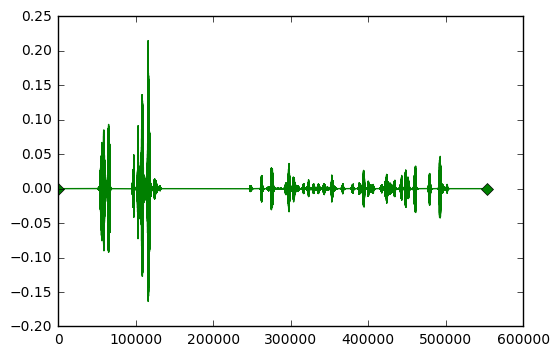

In [43]:
plt.plot(y, '-gD', markevery = markers_on.tolist())

In [20]:
def plot_with_marks(y, power, thres, n_fft, save_pic = False):
    markers_on = autodetec(y, power, thres)
    markers_on = markers_on.tolist()
    D = librosa.stft(y, hop_length = n_fft, n_fft = n_fft)
    #print(D.shape)
    #print(np.max(D))
    D = librosa.amplitude_to_db(D, ref=np.max)
    print(D.shape)
    M, N = D.shape
    #print(np.min(D))
    
    for frame in markers_on:
        #print(int(np.floor(frame/n_fft)))
        D[:int(M/20), int(np.floor(frame/n_fft))] = 10
        
    #D[:,200] = -80
    librosa.display.specshow(D, y_axis='log', x_axis='time')
    plt.title('Power spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    if (save_pic): plt.savefig("../pics/file.power_{}.thres_{}.nfft_{}.svg".format(power, thres, n_fft))
        


#plot_with_marks(y, 2, 0.2, 2048)

máximo do envelope 0.3230019211769104
(1025, 88)


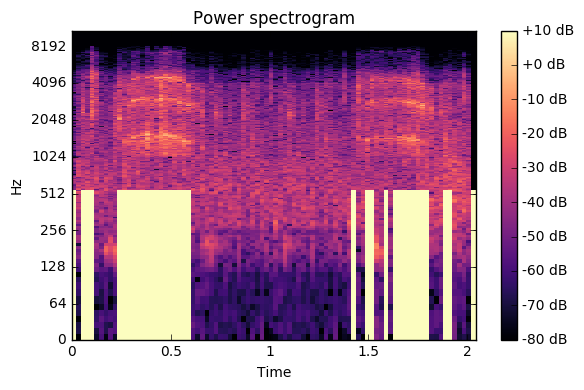

In [45]:
#for i in range(100):
#    for pot in range(1, 5):
#        time.sleep(0.100)
#        plot_with_marks(y, pot, i/100.0, 2048)
#        plt.close('all')
y, sr = librosa.load('Rexp/100041.filtered1.wav')
plot_with_marks(y, 1, 0.07, 2048)

In [49]:
file_dirs = util.return_random_audio(util.choose_species(1))
print(file_dirs)


['/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Thraupis palmarum/song/100139-1.wav', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Thraupis palmarum/song/100139-1.wav.filtered1.wav', '/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Thraupis palmarum/song/100139-1.wav.filtered2.wav']


In [58]:
IPython.display.Audio(file_dirs[0])

máximo do envelope 0.0979088842868805
mínimo do envelope 0.0
média do envelope 0.004592174664139748
pct menores: 0.9991758461047254
pct maiores: 0.0008241538952745849
(1025, 245)


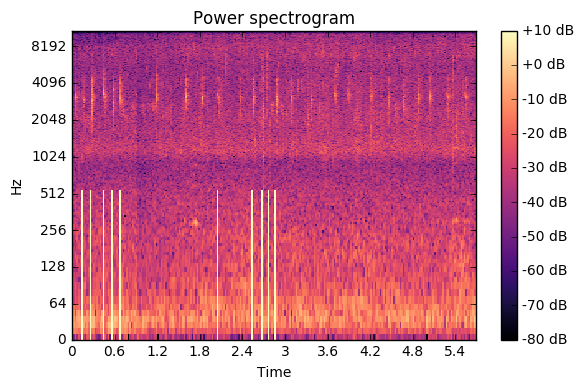

In [92]:
y, sr = librosa.load(file_dirs[0])
plot_with_marks(y, 1, 0.07, 2048, 'si)

In [59]:
IPython.display.Audio(file_dirs[1])

máximo do envelope 0.052709225565195084
mínimo do envelope 1.3549088517805785e-09
média do envelope 0.0005745916860178113
pct menores: 0.9914130365355135
pct maiores: 0.00858696346448646
(1025, 245)


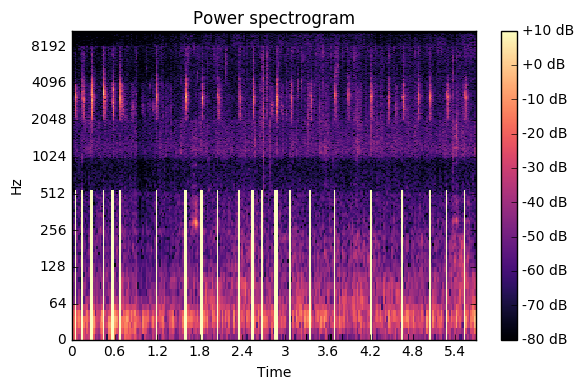

In [93]:
y, sr = librosa.load(file_dirs[1])
plot_with_marks(y, 1, 0.01, 2048)